In [34]:
import requests
import pandas as pd
from ckanapi import RemoteCKAN
import numpy as np
import matplotlib

ckan = RemoteCKAN('https://data.wprdc.org')

## Download dataset and resource metadata

In [35]:
packages = ckan.action.current_package_list_with_resources(limit=500)
len(packages)

333

## Create single table of all resources

In [36]:
# flatten packages to list of just their resources.
all_resources = [resource for sublist in [package['resources'] for package in packages] for resource in sublist]

resources_df = pd.DataFrame(all_resources)
resources_df = resources_df.set_index('id')
# enrich with some package metadata
package_lookup = {p['id']: p for p in packages}

resources_df['package_name']  = resources_df['package_id'].map(lambda pid: package_lookup[pid]['name'])
# get sizes from database export
size_df = pd.read_csv('resource_sizes.csv')
resources_df = resources_df.join(size_df.set_index('id'))

resources_df.to_csv('wprdc_resources.csv')
resources_df['pg_relation_size'] = resources_df['pg_relation_size'].fillna(0)
resources_df

,mimetype,cache_url,hash,description,name,format,url,datastore_active,cache_last_updated,package_id,...,mimetype_inner,last_modified,position,revision_id,url_type,resource_type,size,package_name,pg_size_pretty,pg_relation_size
id,,,,,,,,,,,,,,,,,,,,,
36fb4629-8003-4acc-a1ca-3302778a530d,text/csv,None,,"Since this is a large table, if you wish to do...",Hourly Air Quality Data,CSV,https://tools.wprdc.org/downstream/36fb4629-80...,True,None,c7b3266c-adc6-41c0-b19a-8d4353bfcdaf,...,None,2023-04-09T21:22:51.471930,0,d3095d71-057e-4c7f-bf59-f20585f556d1,datapusher,None,NaN,allegheny-county-air-quality,2372 MB,2.487026e+09
4ab1e23f-3262-4bd3-adbf-f72f0119108b,text/csv,None,,,Daily AQI Data,CSV,https://data.wprdc.org/datastore/dump/4ab1e23f...,True,None,c7b3266c-adc6-41c0-b19a-8d4353bfcdaf,...,None,2023-04-09T21:20:08.806816,1,e5b8010d-4296-4b9d-9767-0f228932a710,datapusher,None,NaN,allegheny-county-air-quality,14 MB,1.449165e+07
01297a0a-4160-41b3-8caf-90f7857ab7bd,text/html,None,,,Air Quality List of Acronyms and Flag Definitions,HTML,https://tools.wprdc.org/pages/air-quality-docs...,False,None,c7b3266c-adc6-41c0-b19a-8d4353bfcdaf,...,None,None,2,b63179f0-6a69-461e-889c-ac4ab5b0a279,,None,NaN,allegheny-county-air-quality,NaN,0.000000e+00
b646336a-deb4-4075-aee4-c5d28d88c426,text/csv,None,,,Sensor Locations,CSV,https://data.wprdc.org/datastore/dump/b646336a...,True,None,c7b3266c-adc6-41c0-b19a-8d4353bfcdaf,...,None,2023-04-09T21:22:59.025202,3,0ba2eddf-cfc7-4e22-bfbe-1a6a800230d7,datapusher,None,1421.0,allegheny-county-air-quality,32 kB,3.276800e+04
7f7072ce-7c19-4813-a45c-6135cf4505bb,application/json,None,,,Sensor Locations (GeoJSON),GeoJSON,https://data.wprdc.org/dataset/c7b3266c-adc6-4...,True,None,c7b3266c-adc6-41c0-b19a-8d4353bfcdaf,...,None,2023-04-09T21:23:04.872534,4,ed31b212-e4c9-479d-99fa-9650223558c7,upload,None,6309.0,allegheny-county-air-quality,24 kB,2.457600e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99217cce-24e0-4136-a619-f28da1b0b0ed,application/zip,None,,,2017 Parking Purchases (compressed),ZIP,https://data.wprdc.org/dataset/e87ccf87-90f6-4...,False,None,e87ccf87-90f6-4023-ba4e-5a2f58793a72,...,None,2019-04-08T17:57:22.921679,3,191cc266-59ca-4596-b827-42d471741d3f,upload,None,124634321.0,parking-purchases,NaN,0.000000e+00
2bd36135-1104-4988-92c6-64a43ffbdf0d,application/zip,None,,,2018 Parking Purchases (compressed),ZIP,https://data.wprdc.org/dataset/e87ccf87-90f6-4...,False,None,e87ccf87-90f6-4023-ba4e-5a2f58793a72,...,None,2019-04-08T18:14:11.674512,4,5c59d4aa-4a48-49d0-9f13-58820c759536,upload,None,116408173.0,parking-purchases,NaN,0.000000e+00
1ac3a889-61b5-452a-950d-c7533d9a5e23,application/json,None,,,Green Infrastructure Projects,GeoJSON,https://data.wprdc.org/dataset/30bbb37c-ca2d-4...,False,None,30bbb37c-ca2d-47e6-bae4-72c57272383c,...,None,2019-07-10T17:59:13.219310,0,4a98e52a-9a86-4808-8a4b-b7c78bac33e4,upload,None,5171.0,green-infrastructure-projects,NaN,0.000000e+00


<AxesSubplot: ylabel='Frequency'>

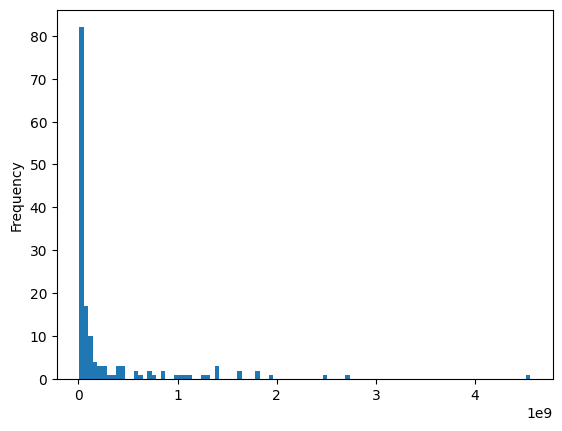

In [37]:
resources_df[resources_df['pg_relation_size'] > 10485760]['pg_relation_size'].plot.hist(bins=100)

<AxesSubplot: ylabel='Frequency'>

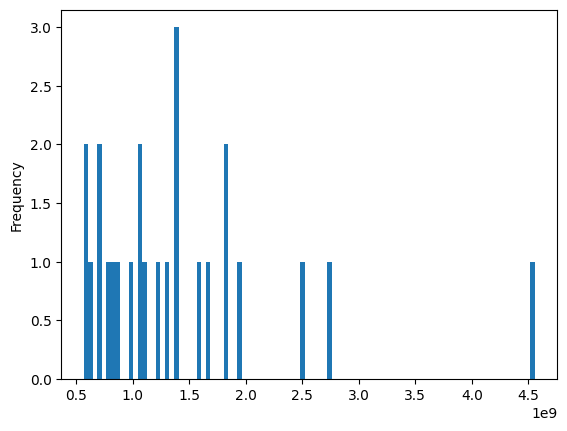

In [38]:
resources_df[resources_df['pg_relation_size'] > 10485760 * 50]['pg_relation_size'].plot.hist(bins=100)


## Explore Package Data

In [39]:
df = pd.read_csv('package_list.csv', index_col='id', parse_dates=['metadata_created', 'metadata_modified'])
df

,name,title,version,url,notes,license_id,revision_id,author,author_email,maintainer,maintainer_email,state,type,owner_org,private,metadata_modified,creator_user_id,metadata_created
id,,,,,,,,,,,,,,,,,,
7699b899-6e01-44cd-841a-7962cd43311c,baum-center-zoning-overlay1,Baum Center Zoning Overlay,NaN,http://pghgis-pittsburghpa.opendata.arcgis.com...,Pittsburgh Baum Centre Zoning Overlay,notspecified,37700bb2-dc97-4a01-855c-7d9996088b40,NaN,NaN,NaN,NaN,deleted,dataset,9ecaff80-fb4a-457b-8141-e53f7c991890,f,2021-02-04 02:53:44.641226,90e6b24a-729c-43ea-9a24-2e060d24d07d,2018-05-23 14:13:21.426230
6916c51e-4ab2-47c8-bd18-90ef306841f7,allegheny-county-private-schools-locations2,Allegheny County Private Schools Locations,NaN,https://openac-alcogis.opendata.arcgis.com/map...,<span style='font-size:10.0pt; font-family:&qu...,NaN,d59b6057-424b-49b9-aa0a-65a69f55d50b,NaN,NaN,NaN,NaN,deleted,dataset,f6dcf8fb-2051-4226-8c74-de9fbc699684,f,2022-04-27 16:53:09.666020,90e6b24a-729c-43ea-9a24-2e060d24d07d,2022-04-27 15:36:51.210709
46fb3ca4-e844-4b42-b034-e87291d34699,pittsburgh-public-school-locations,Pittsburgh Public School Locations,NaN,NaN,"Pittsburgh Public School locations, including ...",other-pd,387edaca-4185-47f5-807e-770613478ba3,NaN,NaN,NaN,NaN,active,dataset,4b16ad54-d76c-47fc-b223-323950e38a14,f,2020-06-09 15:35:57.506390,9c1c3a99-0232-4b6c-b105-4a1ac5074184,2019-04-29 20:41:15.237263
76250dae-cad5-401e-acf4-b771dd30ae9b,allegheny-county-building-footprint-locations1,Allegheny County Building Footprint Locations,NaN,https://openac-alcogis.opendata.arcgis.com/dat...,<span style='font-size:10.0pt; font-family:&qu...,NaN,cb5c7ebd-f0ba-47a5-90cc-26503ec8b994,NaN,NaN,NaN,NaN,deleted,dataset,f6dcf8fb-2051-4226-8c74-de9fbc699684,f,2021-03-09 17:00:26.028171,90e6b24a-729c-43ea-9a24-2e060d24d07d,2020-10-20 17:00:11.621894
ae42bbb0-4aee-441c-aabb-594c5b4fd79a,residential-permit-parking-program-areas0,Residential Permit Parking Program Areas,NaN,http://pghgis-pittsburghpa.opendata.arcgis.com...,PGH Residential Permit Parking Program,notspecified,c5936c71-b1ad-4345-9e76-b9753726b2ff,NaN,NaN,NaN,NaN,deleted,dataset,9ecaff80-fb4a-457b-8141-e53f7c991890,f,2021-03-10 03:08:32.107392,90e6b24a-729c-43ea-9a24-2e060d24d07d,2018-05-23 14:12:57.560308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1d38b5ef-fa53-4c15-9a50-905d4d573292,pittsburgh-parking-meters-and-payment-points,Pittsburgh Parking Meters and Payment Points,NaN,NaN,This dataset contains information on the Pitts...,cc-by,0bb14f0f-b32d-4483-a187-6280110198cc,NaN,NaN,NaN,NaN,active,dataset,7e3450fb-7b3e-41c9-aa1e-ca24980ec85a,f,2023-04-09 11:56:09.328649,085f4393-3645-4ace-b4ad-6fa60a5b14c0,2018-07-28 22:46:01.308980
d660edf8-9157-45ad-a282-50822badfaae,pittsburgh-pli-violations-report,Pittsburgh PLI/DOMI Violations Report,NaN,NaN,This dataset originally housed Department of P...,cc-zero,1a58b667-e8c9-4587-9227-f7027a430fc5,NaN,NaN,NaN,NaN,active,dataset,9ecaff80-fb4a-457b-8141-e53f7c991890,f,2023-04-09 07:49:05.888904,9195f191-1e0a-4b81-ba44-ddb02fd4ee0d,2015-12-04 16:15:11.183903
f9006efd-eac0-467a-a0d2-3b3a9a59cd39,condemned-properties,Condemned and Dead-End Properties,NaN,NaN,This dataset contains condemned properties in ...,cc-by,a4a6ea9b-7358-4e7d-a4a6-40ca50bb380b,NaN,NaN,NaN,NaN,active,dataset,9ecaff80-fb4a-457b-8141-e53f7c991890,f,2023-04-09 07:55:39.684565,c04d83b9-8d45-45c6-b6c3-f82aa39ae539,2023-01-27 18:33:04.492449


In [40]:
df.describe()

,version
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [41]:
df['metadata_modified'].describe(datetime_is_numeric=True)

count                              530
mean     2022-02-20 21:59:47.114592512
min         2015-07-14 19:16:10.527033
25%      2021-03-09 17:00:25.319997440
50%      2022-04-27 16:53:08.873945088
75%      2023-03-15 12:04:26.334837248
max         2023-04-10 01:23:05.024854
Name: metadata_modified, dtype: object

## Compare Tables on New and Old DB

In [43]:
# details from current deployment
# \COPY (SELECT R.*, P.private FROM resource R JOIN package P on R.package_id = P.id WHERE P.private = 'f' AND R.state = 'active') TO '/home/ubuntu/resource_list.csv' CSV HEADER;
old_resource_list_df = pd.read_csv('resource_list.csv').set_index('id')
# \COPY (SELECT * FROM package) TO '/home/ubuntu/package_list.csv' CSV HEADER;
old_package_list_df = pd.read_csv('package_list.csv').set_index('id')

# \COPY (select  table_name,  pg_size_pretty(pg_relation_size(quote_ident(table_name))),  pg_relation_size(quote_ident(table_name)) from information_schema.tables where table_schema = 'public' order by 3 desc) TO '/path/to/table_sizes.csv' (format CSV);
new_resource_sizes_df = pd.read_csv('dumped_resource_sizes.csv').set_index('id')
old_resource_sizes_df = pd.read_csv('resource_sizes.csv').set_index('id')

#  \COPY (SELECT nspname AS schemaname,relname,reltuples FROM pg_class C LEFT JOIN pg_namespace N ON (N.oid = C.relnamespace) WHERE nspname NOT IN ('pg_catalog', 'information_schema') AND relkind='r' ORDER BY reltuples DESC) TO '/path/to/table_row_counts.csv' (format CSV);
new_resource_rows_df = pd.read_csv('new_row_counts.csv').set_index('id')
old_resource_rows_df = pd.read_csv('old_row_counts.csv').set_index('id')

# join all sources of data
size_comparison_df = old_resource_list_df.join(old_resource_sizes_df.join(new_resource_sizes_df).join(old_resource_rows_df).join(new_resource_rows_df))

# the uploads were batched by IDs beginning with the same char
size_comparison_df['group'] = size_comparison_df.index.str[0]

# calculate size comparison columns
size_comparison_df['size_diff'] = size_comparison_df['new_pg_relation_size'] - size_comparison_df['pg_relation_size']
size_comparison_df['size_new/old'] = size_comparison_df['new_pg_relation_size'] / size_comparison_df['pg_relation_size']

# calculate tuple (row?) counts
size_comparison_df['tuples_diff'] = size_comparison_df['new_tuple_count'] - size_comparison_df['old_tuple_count']
size_comparison_df['tuples_new/old'] = size_comparison_df['new_tuple_count'] / size_comparison_df['old_tuple_count']

# add package meta data
size_comparison_df = size_comparison_df.join(old_package_list_df, on='package_id', rsuffix='_package')

# filter out private, and deleted datasets
size_comparison_df = size_comparison_df[(size_comparison_df['state_package'] == 'active') & (size_comparison_df['private'] == 'f') & (size_comparison_df['state'] == 'active')]
size_comparison_df = size_comparison_df.drop('notes', axis=1)
size_comparison_df.to_csv('size_comparisons.csv')

In [44]:
size_comparison_df

,url,format,description,position,revision_id,hash,state,extras,name,resource_type,...,author_email,maintainer,maintainer_email,state_package,type,owner_org,private_package,metadata_modified,creator_user_id,metadata_created
id,,,,,,,,,,,,,,,,,,,,,
fd4d0f47-5a05-4716-861e-b0b328effe8b,https://data.wprdc.org/dataset/e41c0a67-837f-4...,GeoJSON,NaN,2,1e037a30-3976-4f1e-b86c-3209201d3a58,NaN,active,"{""datastore_active"": false}",GeoJSON,NaN,...,NaN,NaN,NaN,active,dataset,f6dcf8fb-2051-4226-8c74-de9fbc699684,f,2023-04-08 17:27:58.59801,90e6b24a-729c-43ea-9a24-2e060d24d07d,2017-05-23 14:32:40.593774
4ae88ba4-f535-44d7-9a96-08c6f38a34fc,https://data.wprdc.org/dataset/cfaffd5c-ab5a-4...,CSV,NaN,0,7164a66f-53d5-43bc-aa08-0e2bbcda83b6,NaN,active,"{""datastore_active"": true}",Public Works - Block Party Summary,NaN,...,lee.haller@pittsburghpa.gov,Koury Lape,kourylape@gmail.com,active,dataset,9ecaff80-fb4a-457b-8141-e53f7c991890,f,2021-02-04 17:47:03.968772,0b3083b1-b5ef-4dbb-b23c-58e623476698,2015-04-14 18:16:01.072372
c926cfe2-e085-4808-94bc-b33895089a74,https://data.wprdc.org/dataset/8f92ae09-4cfa-4...,GeoJSON,NaN,2,a36de255-fd63-4469-97f1-70340dbb9aaa,NaN,active,"{""datastore_active"": false}",GeoJSON,NaN,...,NaN,NaN,NaN,active,dataset,9ecaff80-fb4a-457b-8141-e53f7c991890,f,2023-03-29 12:02:07.901705,90e6b24a-729c-43ea-9a24-2e060d24d07d,2021-03-09 21:02:18.724974
b378b3ba-71e9-418b-9697-ecdff6f62724,http://www.makemytripcount.org/,HTML,Make My Trip Count Website,2,803276bf-0a92-4028-89e6-c7c2aa6a3c54,NaN,active,"{""datastore_active"": false}",Make My Trip Count Website,NaN,...,NaN,NaN,NaN,active,dataset,e35882ba-af3c-4e57-8204-6dea559678a0,f,2021-02-04 01:55:54.679227,9e43a726-2b62-4205-8f4c-aca5d8521b78,2017-01-06 19:47:17.247589
8bda6be7-e90e-46d0-8577-693a27d8812b,https://data.wprdc.org/dataset/6bb2a968-761d-4...,ZIP,NaN,1,3bc21588-61f8-4f71-a2d2-26372c44eeca,NaN,active,"{""datastore_active"": false}",City of Pittsburgh Parcel Boundaries,NaN,...,NaN,NaN,NaN,active,dataset,4eb88a01-738a-4ca1-96e4-b0bf8d3ec3dc,f,2021-02-04 01:55:34.808311,f40ecfea-0195-4903-8b7d-cc99f25d7d8c,2016-10-07 17:49:36.820423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fba9b0ad-b572-46c7-9f08-4119435f913b,https://data.wprdc.org/dataset/22fe57da-f5b8-4...,ZIP,This is a compressed CSV file version of the d...,20,3bb798bb-f087-4d80-b7dc-7ee60a37cf83,NaN,active,"{""datastore_active"": false}",Raw tax-lien records (beta) [API-only version]...,NaN,...,NaN,NaN,NaN,active,dataset,f6dcf8fb-2051-4226-8c74-de9fbc699684,f,2023-04-02 23:06:11.78898,ed442faf-d3dc-48fb-8964-133201905237,2016-04-05 15:40:27.020076
4af05575-052d-40ff-9311-d578319e810a,https://data.wprdc.org/datastore/dump/4af05575...,CSV,NaN,4,633648a8-bcdf-4ef5-88b0-005f0df7b2c6,NaN,active,"{""datastore_active"": true}",Archive Sales Results,NaN,...,NaN,NaN,NaN,active,dataset,f6dcf8fb-2051-4226-8c74-de9fbc699684,f,2022-12-16 09:15:32.900946,e7f3f84d-571d-45a8-a84a-b79ce88bc083,2015-07-22 19:23:23.399359
b4899889-fbf4-43a5-a5ba-ae178fa07347,https://data.wprdc.org/datastore/dump/b4899889...,CSV,NaN,5,e1b42481-07ca-46e6-be9b-f06f46a984a3,NaN,active,"{""datastore_active"": true}",Archive Bid List,NaN,...,NaN,NaN,NaN,active,dataset,f6dcf8fb-2051-4226-8c74-de9fbc699684,f,2022-12-16 09:15:32.900946,e7f3f84d-571d-45a8-a84a-b79ce88bc083,2015-07-22 19:23:23.399359


## Compare Table Counts

In [45]:
old_resource_sizes_df['group'] = old_resource_sizes_df.index.str[0]
new_resource_rows_df['group'] = new_resource_rows_df.index.str[0]

In [46]:
old_resource_sizes_df.groupby('group').count()

,pg_size_pretty,pg_relation_size
group,,
(,0,0
0,191,191
1,168,168
2,196,196
3,181,181
4,206,206
5,185,185
6,203,203
7,215,215


In [47]:
new_resource_rows_df.groupby('group').count()


,new_tuple_count
group,
0,191
1,168
2,195
3,180
4,206
5,185
6,203
7,214
8,188
